In [1]:
import pandas as pd
import os
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import seed
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(0)
   tf.random.set_seed(42)
   np.random.seed(42)
   random.seed(42)

# Data Exploration

In [4]:
reset_random_seeds()
df = pd.read_csv('/content/drive/My Drive/Heart dieases prediction/Input/heart_disease.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Create new column name kfold

In [5]:
from sklearn import model_selection
reset_random_seeds()
df = df.sample(frac=1).reset_index(drop=True)
df['kfold'] = -1
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
for f, (train_, val_) in enumerate(kf.split(X=df)):
  df.loc[val_, 'kfold'] = f

df.to_csv('/content/drive/My Drive/Heart dieases prediction/heart_disease_kfold.csv', index=False)

In [6]:
df_kfold = pd.read_csv('/content/drive/My Drive/Heart dieases prediction/heart_disease_kfold.csv')
df_kfold.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,kfold
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0,3
1,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,4
2,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1,2
3,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0,4
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,3


In [7]:
df_kfold.shape

(303, 15)

In [8]:
df_kfold.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
kfold         int64
dtype: object

In [9]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
kfold       False
dtype: bool

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
kfold       0
dtype: int64

In [11]:
df_kfold.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'kfold'],
      dtype='object')

In [12]:
for i in df_kfold.columns:
  print(df_kfold[i].unique())

[57 59 56 71 46 54 52 40 44 34 61 64 67 51 50 62 45 66 63 48 41 43 58 55
 60 69 68 42 38 76 39 29 47 65 70 74 35 37 53 49 77]
[1 0]
[0 3 2 1]
[150 170 134 110 138 200 122 125 140 178 120 105 118 130 160 152 165 128
 104 124 115 132 142 135 102 129 144 145 117 154 126 100 106  94 108 112
 114 155 136 123 192 180 148 172 146 156 174 164 101]
[276 288 126 409 265 168 243 286 273 192 270 325 167 204 235 210 188 311
 166 227 283 237 302 242 223 261 289 254 263 207 267 208 226 245 255 199
 260 221 214 247 205 225 256 309 203 318 300 164 196 193 282 295 231 250
 230 303 294 335 198 244 222 212 262 232 218 220 175 184 211 268 298 239
 240 197 219 233 340 234 209 177 187 290 394 277 299 322 201 253 241 229
 269 224 313 284 315 275 353 330 215 341 213 236 185 217 183 274 564 266
 417 326 271 281 307 174 248 178 304 228 246 264 354 157 293 186 258 149
 321 308 319 278 360 169 257 160 327 342 305 407 259 141 206 249 176 306
 252 172 131 182 216 200 180 195]
[0 1]
[0 1 2]
[112 159 173 150 130 174 1

In [13]:
df_kfold.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [14]:
# Information of each columns
#  As we can see from unique values from columns we can clearly see that 
#  which variables are categorical and numerical
info = ['Age in years: Numerical', '1 = male; 0 = female: Categorical', 'Chest pain type (0, 1, 2, 3, 4): Categorical',
        'Resting blood pressure (in mm Hg on admission): Numerical', 'Serum cholesterol in mg/dl: Numerical',
       'fasting blood sugar in 120 mg/dl (1 = true; 0 = false): Categorical', 'Resting electrocardiogram results (0, 1, 2): Categorical',
       'Maximum heart rate achieved: Numerical', 'Exercise induced angina (1 = yes; 0 = no): categorical', 'ST depression induced by exercise relative to rest: Numerical',
       'Slope of the peak exercise ST segment: Numerical', 'Number of major vessels (0-4) colored by fluoroscopy: Both numerical and categorical',
       '3 = normal; 6 = fixed defect; 7 = reversible defect: Categorical', 'Diagnosis of heart disease (1 = true; 0 = false): Target'
       ]


for i in range(len(info)):
    print(df.columns[i]+"\t\t:\t\t"+info[i])

age		:		Age in years: Numerical
sex		:		1 = male; 0 = female: Categorical
cp		:		Chest pain type (0, 1, 2, 3, 4): Categorical
trestbps		:		Resting blood pressure (in mm Hg on admission): Numerical
chol		:		Serum cholesterol in mg/dl: Numerical
fbs		:		fasting blood sugar in 120 mg/dl (1 = true; 0 = false): Categorical
restecg		:		Resting electrocardiogram results (0, 1, 2): Categorical
thalach		:		Maximum heart rate achieved: Numerical
exang		:		Exercise induced angina (1 = yes; 0 = no): categorical
oldpeak		:		ST depression induced by exercise relative to rest: Numerical
slope		:		Slope of the peak exercise ST segment: Numerical
ca		:		Number of major vessels (0-4) colored by fluoroscopy: Both numerical and categorical
thal		:		3 = normal; 6 = fixed defect; 7 = reversible defect: Categorical
target		:		Diagnosis of heart disease (1 = true; 0 = false): Target


# Data analysis

Text(0, 0.5, 'count')

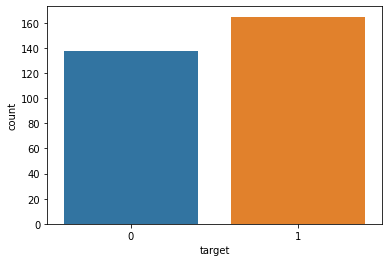

In [15]:
# Countplot for checking that the dataset is imbalanced or not
sns.countplot('target', data=df);
plt.xlabel('target')
plt.ylabel('count')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


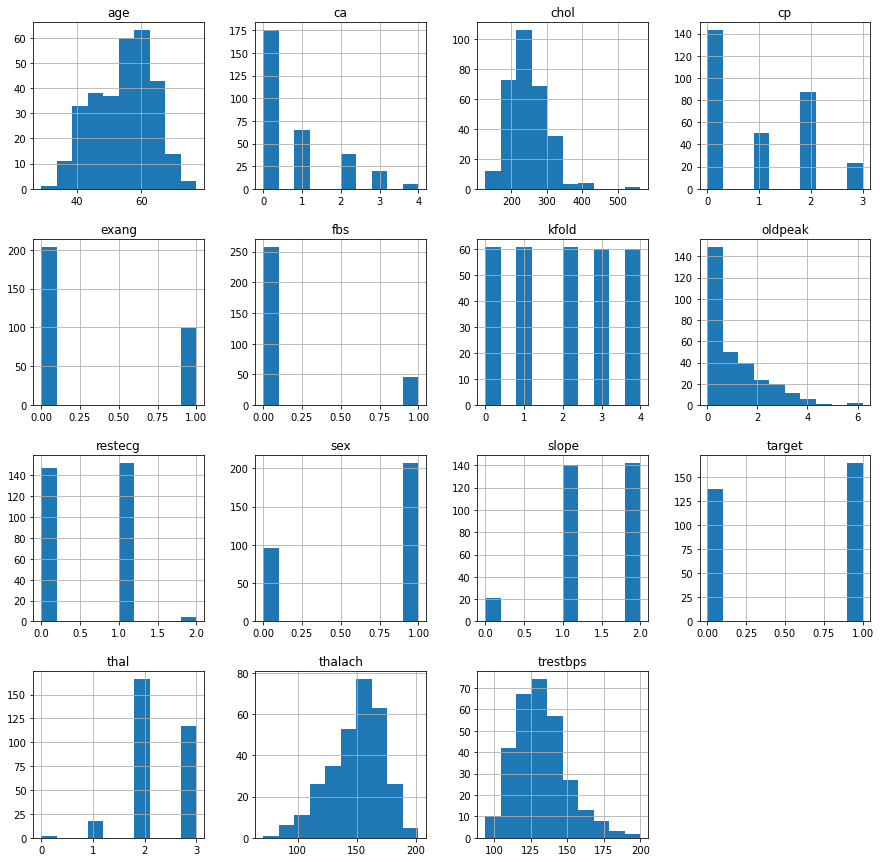

In [16]:
# Plotting histogram for entire dataset
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
g = df_kfold.hist(ax=ax)

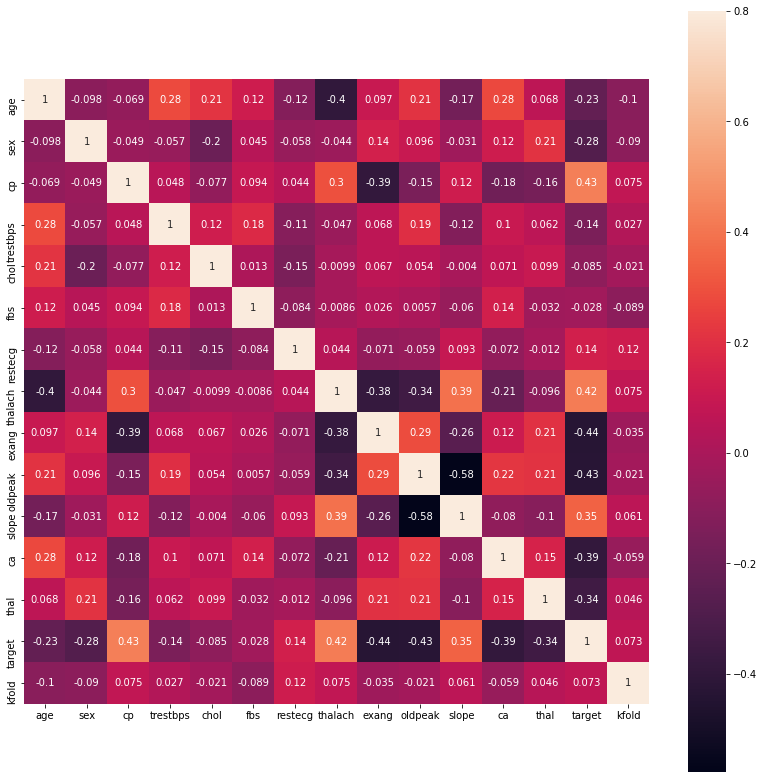

In [17]:
# corelation metrix

cormat = df_kfold.corr()
f, ax = plt.subplots(figsize=(14, 14))
hmp = sns.heatmap(cormat,annot=True, vmax=.8, square=True);

From the above heatmap we can see that slope, thalach and cp are directly effecting the target and yeah somewhat restecg is also contributing. 

Also from seeing from the above hmap, exang and oldpeak are -0.44 & -0.43
means the value of both which affect the target is equal to null.

# Feature Engineering

In [18]:
# Handling categorical variables
# Here we will convert categorical variables into dummyindicator variables using pd.get_dummies
# categorical columns in our dataset are [sex, cp, fbs, rectecg, exang, thal] which i had informed in info of data exploration
df_dummies = pd.get_dummies(df_kfold, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal'])

In [19]:
df_dummies.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca',
       'target', 'kfold', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3',
       'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2', 'exang_0',
       'exang_1', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [20]:
df_dummies.dtypes

age            int64
trestbps       int64
chol           int64
thalach        int64
oldpeak      float64
slope          int64
ca             int64
target         int64
kfold          int64
sex_0          uint8
sex_1          uint8
cp_0           uint8
cp_1           uint8
cp_2           uint8
cp_3           uint8
fbs_0          uint8
fbs_1          uint8
restecg_0      uint8
restecg_1      uint8
restecg_2      uint8
exang_0        uint8
exang_1        uint8
thal_0         uint8
thal_1         uint8
thal_2         uint8
thal_3         uint8
dtype: object

In [21]:
df_dummies.head()

,age,trestbps,chol,thalach,oldpeak,slope,ca,target,kfold,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,thal_0,thal_1,thal_2,thal_3
0,57,150,276,112,0.6,1,1,0,3,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0
1,59,170,288,159,0.2,1,0,0,4,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1
2,57,150,126,173,0.2,2,1,1,2,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1
3,56,134,409,150,1.9,1,2,0,4,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
4,71,110,265,130,0.0,2,1,1,3,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0


In [22]:
# Handling numerical variables
# we will standardize all numerical variables using standard scalar
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
columns_for_ss = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']
df_dummies[columns_for_ss] = ss.fit_transform(df_dummies[columns_for_ss])

In [23]:
df_dummies.head()

,age,trestbps,chol,thalach,oldpeak,slope,ca,target,kfold,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,thal_0,thal_1,thal_2,thal_3
0,0.290464,1.049520,0.574662,-1.646316,-0.379244,-0.649113,0.265082,0,3,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0
1,0.511041,2.191778,0.806568,0.409017,-0.724323,-0.649113,-0.714429,0,4,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1
2,0.290464,1.049520,-2.324160,1.021244,-0.724323,0.976352,0.265082,1,2,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1
3,0.180175,0.135714,3.144951,0.015443,0.742260,-0.649113,1.244593,0,4,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
4,1.834507,-1.234996,0.362082,-0.859167,-0.896862,0.976352,0.265082,1,3,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0


In [24]:
# Splitting the dataset

fold = 4
df_train = df_kfold[df_kfold['kfold'] != fold].reset_index(drop=True)
# validation data is where kfold is equal to provided fold
df_valid = df_kfold[df_kfold['kfold'] == fold].reset_index(drop=True)


# drop the target values 
x_train = df_train.drop('target', axis=1).values
y_train = df_train['target'].values

x_valid = df_valid.drop('target', axis=1).values
y_valid = df_valid['target'].values

In [25]:
x_train.shape[0], x_valid.shape[0]

(243, 60)

In [26]:
x_train.shape[1], x_valid.shape[1]

(14, 14)

# Model Building

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#### Here we will experiment 4 ml algorithm and neural network
1.) LogisticRegression

2.) Decisiontreeclassifier

3.) Randomforestclassifier

4.) Knearestneighbour

5.) ANN

and hyperparammeter optimization using Randmoizedsearchcv, Gridsearchcv, Bayesian optimization and Hyperopt then we will compare all and see that which gives better result.

In [28]:
def find_best_model_randomizedsearchcv(X, y):
    models = {
        'logistic_regression':{
            'model': LogisticRegression(n_jobs=-1, random_state=42),
            'parameters':{
                'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'max_iter': [100, 150, 200, 250, 300]
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random'],
                'max_depth': [5, 10, 20, 30, 40]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(random_state=42),
            'parameters': {
                'n_estimators': [5, 10, 15, 20, 25],
                'criterion': ['gini', 'entropy'],
                'max_depth': [5, 10, 20, 30, 40],
            }
        },
        
        'knn': {
            'model': KNeighborsClassifier(algorithm='auto'),
            'parameters': {
                'n_neighbors': [5, 10, 12, 16, 21, 31, 41],
                'weights': ['uniform', 'distance'],
            }
        }
    }
    
    scores = []
    for model_name, model_params in models.items():
        gs = RandomizedSearchCV(model_params['model'], model_params['parameters'],n_jobs=-1, n_iter=14, scoring='accuracy')
        gs.fit(x_train, y_train)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        v = pd.DataFrame(scores, columns=['model','best_parameters','score'])
    return v

In [29]:
find_best_model_randomizedsearchcv(x_train, y_train)

,model,best_parameters,score
0,logistic_regression,"{'penalty': 'l2', 'max_iter': 300}",0.810629
1,decision_tree,"{'splitter': 'best', 'max_depth': 5, 'criterio...",0.778061
2,random_forest,"{'n_estimators': 25, 'max_depth': 10, 'criteri...",0.818707
3,knn,"{'weights': 'uniform', 'n_neighbors': 12}",0.670323


In [30]:
def find_best_model_gridsearchcv(X, y):
    models = {
        'logistic_regression':{
            'model': LogisticRegression(n_jobs=-1, random_state=42),
            'parameters':{
                'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'max_iter': [100, 150, 200, 250, 300]
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random'],
                'max_depth': [5, 10, 20, 30, 40]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(random_state=42),
            'parameters': {
                'n_estimators': [5, 10, 15, 20, 25],
                'criterion': ['gini', 'entropy'],
                'max_depth': [5, 10, 20, 30, 40],
            }
        },
        
        'knn': {
            'model': KNeighborsClassifier(algorithm='auto'),
            'parameters': {
                'n_neighbors': [5, 10, 12, 16, 21, 31, 41],
                'weights': ['uniform', 'distance'],
            }
        }
    }
    
    scores = []
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'],n_jobs=-1, scoring='accuracy')
        gs.fit(x_train, y_train)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        k = pd.DataFrame(scores, columns=['model','best_parameters','score'])
        print(gs.best_params_)
    return k

In [31]:
find_best_model_gridsearchcv(x_train, y_train)

{'max_iter': 300, 'penalty': 'l2'}
{'criterion': 'gini', 'max_depth': 40, 'splitter': 'random'}
{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 25}
{'n_neighbors': 12, 'weights': 'uniform'}


,model,best_parameters,score
0,logistic_regression,"{'max_iter': 300, 'penalty': 'l2'}",0.810629
1,decision_tree,"{'criterion': 'gini', 'max_depth': 40, 'splitt...",0.793878
2,random_forest,"{'criterion': 'gini', 'max_depth': 10, 'n_esti...",0.818707
3,knn,"{'n_neighbors': 12, 'weights': 'uniform'}",0.670323


In [34]:
!pip install scikit-optimize

     |████████████████████████████████| 81kB 2.3MB/s 


In [35]:
# Bayesian optimization
def optimize(params, param_names, x, y):
  params = dict(zip(param_names, params))
  model = RandomForestClassifier(**params)
  model.fit(x, y)
  preds3 = model.predict(x_valid)
  score = metrics.accuracy_score(y_valid, preds3)
  return -1.0 * np.mean(score)

In [36]:
from functools import partial
from skopt import space, gp_minimize
param_space = [
               space.Integer(5, 40, name="max_depth"),
               space.Integer(5, 100, name="n_estimators"),
               space.Categorical(["gini", "entropy"], name="criterion")
]
param_names = ["max_depth", "n_estimators", "criterion"]

optimization_function = partial(
    optimize,
    param_names=param_names,
    x = x_train,
    y = y_train
)
result = gp_minimize(optimization_function, dimensions=param_space, n_calls=15, n_random_starts=10, verbose=10)

print(dict(zip(param_names, result.x)))

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.1421
Function value obtained: -0.8833
Current minimum: -0.8833
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1010
Function value obtained: -0.8333
Current minimum: -0.8833
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1136
Function value obtained: -0.8667
Current minimum: -0.8833
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.1486
Function value obtained: -0.8500
Current minimum: -0.8833
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.1015
Function value obtained: -0.8667
Current minimum: -0.8833
Iteration No: 6 started. 

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 0.4553
Function value obtained: -0.9000
Current minimum: -0.9000
Iteration No: 14 started. Searching for the next optimal point.
Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 0.4545
Function value obtained: -0.8500
Current minimum: -0.9000
Iteration No: 15 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 0.4471
Function value obtained: -0.8833
Current minimum: -0.9000
{'max_depth': 5, 'n_estimators': 100, 'criterion': 'gini'}


It is giving 0.90 accuracy

In [37]:
# hyperopt
def optimize_hp(params, x, y):
  model = RandomForestClassifier(**params)
  model.fit(x, y)
  preds4 = model.predict(x_valid)
  score = metrics.accuracy_score(y_valid, preds4)
  return -1.0 * np.mean(score)

In [38]:
from hyperopt import fmin, tpe, hp, Trials
from hyperopt.pyll.base import scope
param_space = {
               "max_depth": hp.quniform("max_depth", 5, 40, 1),
               "n_estimators": scope.int(hp.quniform("n_estimators", 5, 100, 1)),
               "criterion": hp.choice("criterion", ["gini", "entropy"]) 
}
optimization_function_hp = partial(
    optimize_hp,
    x = x_train,
    y = y_train
)
trials = Trials()
result2 = fmin(fn=optimization_function_hp, algo=tpe.suggest, space=param_space, max_evals=15, trials=trials)
print(result2)

100%|██████████| 15/15 [00:01<00:00, 14.34it/s, best loss: -0.8833333333333333]
{'criterion': 0, 'max_depth': 13.0, 'n_estimators': 14.0}


it is performing 0.88 accuracy 

Here it is clearly seen that hyperopt and bayesian optimization is performing better

In [41]:
clf = RandomForestClassifier(criterion='gini', max_depth=5, n_estimators=100)
clf.fit(x_train, y_train)
preds1 = clf.predict(x_valid)
#calculate and print accuracy
accuracy = metrics.accuracy_score(y_valid, preds1)
print(f"Fold={fold}, Accuracy={accuracy}")

Fold=4, Accuracy=0.8833333333333333


In [42]:
lr = LogisticRegression(max_iter= 150, penalty = 'l2', n_jobs=-1, random_state=42)
lr.fit(x_train, y_train)
preds2 = lr.predict(x_valid)
#calculate and print accuracy
accuracy = metrics.accuracy_score(y_valid, preds2)
print(f"Fold={fold}, Accuracy={accuracy}")

Fold=4, Accuracy=0.9


Dont under-estimate the power of LogisticRegression joy:)

In [43]:
cm1 = metrics.confusion_matrix(y_valid, preds2)
cm1

array([[19,  5],
       [ 1, 35]])

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Using TensorFlow backend.


In [45]:
df_kfold.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,kfold
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0,3
1,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,4
2,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1,2
3,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0,4
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,3


In [46]:
reset_random_seeds()
input = keras.Input(shape=(x_train.shape[1],))
x = layers.Dense(64, activation="relu")(input)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dropout(0.1)(x)
output = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(input, output)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

In [47]:
model.fit(x_train , y_train, batch_size=16, epochs=100, validation_data=(x_valid, y_valid), validation_batch_size=12)

Epoch 1/100
16/16 [==============================] - 0s 12ms/step - loss: 9.9499 - accuracy: 0.4733 - val_loss: 5.0804 - val_accuracy: 0.6000
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 6.7795 - accuracy: 0.4897 - val_loss: 1.1625 - val_accuracy: 0.6500
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 4.3963 - accuracy: 0.5597 - val_loss: 1.7696 - val_accuracy: 0.5167
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 3.6892 - accuracy: 0.5103 - val_loss: 1.5265 - val_accuracy: 0.6833
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 2.6163 - accuracy: 0.5638 - val_loss: 1.4582 - val_accuracy: 0.6667
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 2.1741 - accuracy: 0.5720 - val_loss: 0.9111 - val_accuracy: 0.7000
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 1.4661 - accuracy: 0.6091 - val_loss: 0.8502 - val_accuracy: 0.7167
Epoch 8/100


In [48]:
preds = model.predict(x_valid)
cm = metrics.confusion_matrix(y_valid, preds.round())
cm

array([[16,  8],
       [ 3, 33]])

In [49]:
score = metrics.accuracy_score(y_valid, preds.round())
score

0.8166666666666667

Ann is not performing slightly good then ml algo, since only i had tried only for fold-4 if you want to try then just fork and try diff fold